## Project Introduction

### Motivation and Goal
Phishing attacks create a significant threat to internet users, as malicious websites impersonate legitimate ones to steal sensitive information such as usernames, passwords, and credit card details. Our project aims to build a machine learning model that can accurately detect phishing websites, thereby enhancing cybersecurity and protecting users from such attacks.

### Data Source and Description
The dataset used for this project is publicly available and was sourced from the [Phishing Websites Data Repository](https://archive.ics.uci.edu/ml/datasets/Phishing+Websites). It contains 11,054 instances and 31 features, which include various characteristics of URLs, such as the presence of IP addresses, the length of URLs, and the use of special characters. The target variable indicates whether a website is legitimate or phishing.

**Citation of the dataset in APA format:**
- Dheeru, D., & Karra Taniskidou, E. (2017). UCI Machine Learning Repository [https://archive.ics.uci.edu/ml/datasets/Phishing+Websites]. Irvine, CA: University of California, School of Information and Computer Science.

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

In [5]:
df=pd.read_csv("phishing.csv")
df.head()

,Index,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,...,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport,class
0,0,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
1,1,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
2,2,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
3,3,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1
4,4,-1,0,-1,1,-1,-1,1,1,-1,...,1,1,1,1,1,-1,1,-1,-1,1


In [6]:
# Remove duplicates and handle missing values
df = df.drop_duplicates()
df = df.dropna()

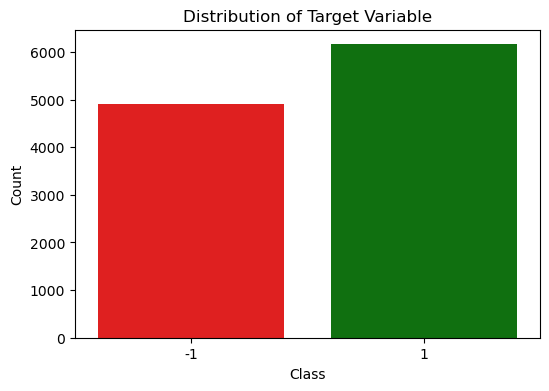

In [7]:
# Exploratory Data Analysis (EDA)
# Target variable distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='class', hue='class', data=df, palette=['red', 'green'], dodge=False, legend=False)
plt.title('Distribution of Target Variable')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

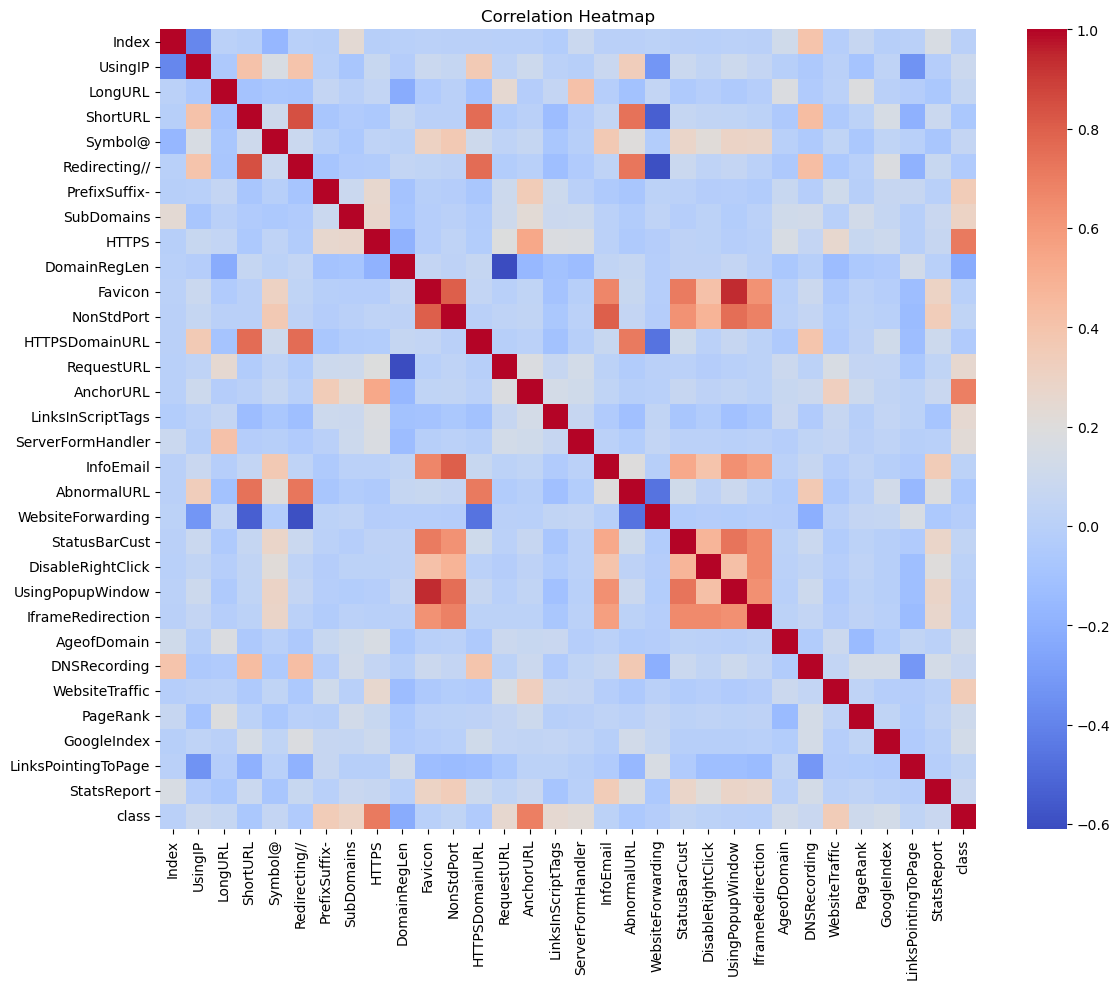

In [8]:
# Correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()
plt.close()

In [9]:
X= df.drop(columns='class')
y = df['class']
X.head()

,Index,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,...,DisableRightClick,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport
0,0,1,1,1,1,1,-1,0,1,-1,...,1,1,1,-1,-1,0,-1,1,1,1
1,1,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,1,-1,1,-1,1,0,-1
2,2,1,0,1,1,1,-1,-1,-1,1,...,1,1,1,-1,-1,1,-1,1,-1,1
3,3,1,0,-1,1,1,-1,1,1,-1,...,1,-1,1,-1,-1,0,-1,1,1,1
4,4,-1,0,-1,1,-1,-1,1,1,-1,...,1,1,1,1,1,1,-1,1,-1,-1


In [10]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=2)


In [47]:
print(train_X.shape)
print(test_X.shape)

(7737, 31)
(3317, 31)


In [12]:
# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=5000),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=3),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "AdaBoost": AdaBoostClassifier(algorithm='SAMME', n_estimators=5, learning_rate=1),  # Specify SAMME algorithm
    "Support Vector Machine": SVC(probability=True)
}

Logistic Regression Accuracy: 0.9231233041905336
Logistic Regression ROC AUC: 0.9772419202618632
              precision    recall  f1-score   support

          -1       0.93      0.90      0.91      1458
           1       0.92      0.95      0.93      1859

    accuracy                           0.92      3317
   macro avg       0.92      0.92      0.92      3317
weighted avg       0.92      0.92      0.92      3317



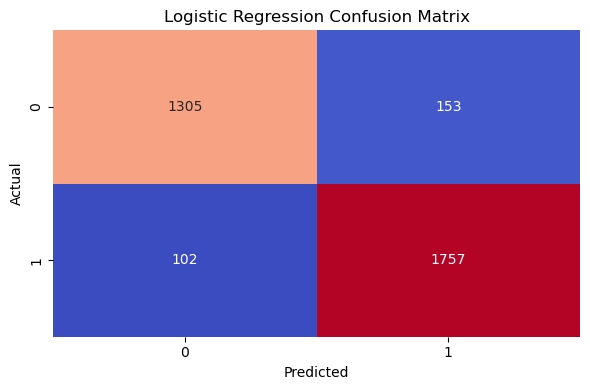

K-Nearest Neighbors Accuracy: 0.6352125414531203
K-Nearest Neighbors ROC AUC: 0.6628065666527204
              precision    recall  f1-score   support

          -1       0.58      0.59      0.59      1458
           1       0.68      0.67      0.67      1859

    accuracy                           0.64      3317
   macro avg       0.63      0.63      0.63      3317
weighted avg       0.64      0.64      0.64      3317



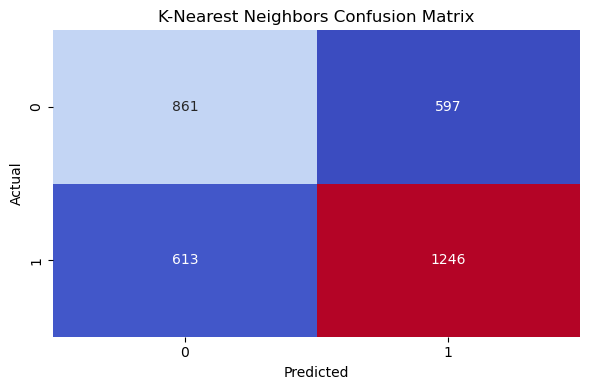

Decision Tree Accuracy: 0.9463370515526078
Decision Tree ROC AUC: 0.9440616627226315
              precision    recall  f1-score   support

          -1       0.95      0.93      0.94      1458
           1       0.94      0.96      0.95      1859

    accuracy                           0.95      3317
   macro avg       0.95      0.94      0.95      3317
weighted avg       0.95      0.95      0.95      3317



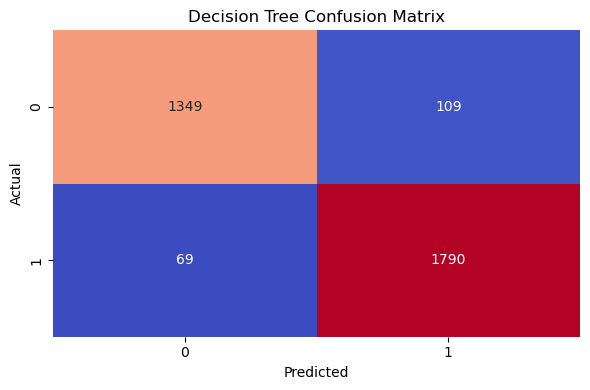

Random Forest Accuracy: 0.9716611395839614
Random Forest ROC AUC: 0.9955304008010559
              precision    recall  f1-score   support

          -1       0.97      0.96      0.97      1458
           1       0.97      0.98      0.97      1859

    accuracy                           0.97      3317
   macro avg       0.97      0.97      0.97      3317
weighted avg       0.97      0.97      0.97      3317



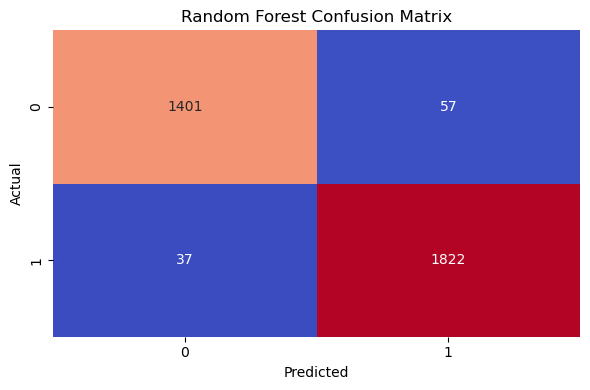

AdaBoost Accuracy: 0.9119686463671993
AdaBoost ROC AUC: 0.964621745248526
              precision    recall  f1-score   support

          -1       0.92      0.88      0.90      1458
           1       0.91      0.94      0.92      1859

    accuracy                           0.91      3317
   macro avg       0.91      0.91      0.91      3317
weighted avg       0.91      0.91      0.91      3317



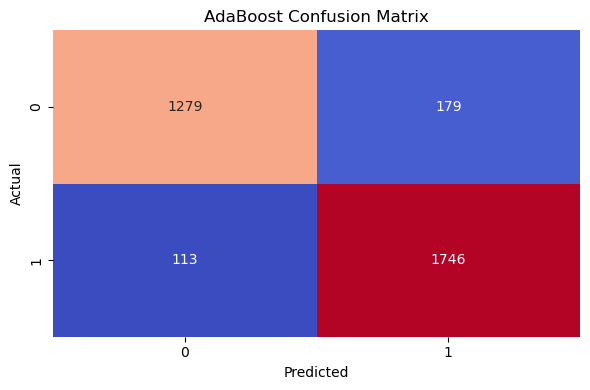

Support Vector Machine Accuracy: 0.5604461863129334
Support Vector Machine ROC AUC: 0.927751656384135
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00      1458
           1       0.56      1.00      0.72      1859

    accuracy                           0.56      3317
   macro avg       0.28      0.50      0.36      3317
weighted avg       0.31      0.56      0.40      3317



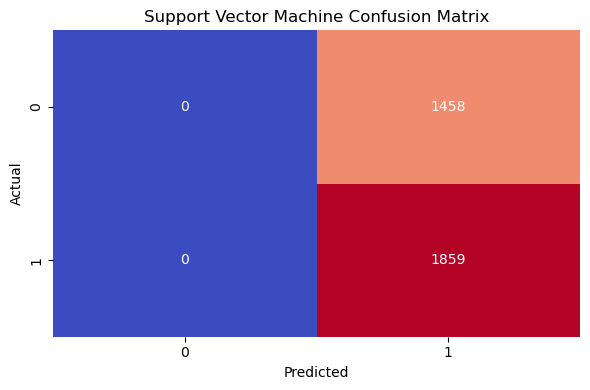

In [13]:
def plot_confusion_matrix(test_y, predictions, title):
    plt.figure(figsize=(6, 4))
    sns.heatmap(confusion_matrix(test_y, predictions), annot=True, fmt="d", cmap="coolwarm", cbar=False)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()
    plt.close()

results = {}
for name, model in models.items():
    model.fit(train_X, train_y)
    predictions = model.predict(test_X)
    accuracy = accuracy_score(test_y, predictions)
    auc = roc_auc_score(test_y, model.predict_proba(test_X)[:, 1])
    results[name] = {"accuracy": accuracy, "roc_auc": auc, "model": model}
    print(f"{name} Accuracy: {accuracy}")
    print(f"{name} ROC AUC: {auc}")
    print(classification_report(test_y, predictions, zero_division=0))
    
    plot_confusion_matrix(test_y, predictions, f'{name} Confusion Matrix')

In [14]:
# Select the best model
best_model_name = max(results, key=lambda k: results[k]["accuracy"])
best_model = results[best_model_name]["model"]
print(f"Best Model: {best_model_name}")

Best Model: Random Forest


In [15]:
# Hyperparameter tuning for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [4, 5, 6, 7, 8],
    'criterion': ['gini', 'entropy']
}

In [16]:
grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(train_X, train_y)

print(f"Best parameters: {grid_search.best_params_}")
best_model = grid_search.best_estimator_

Best parameters: {'criterion': 'entropy', 'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 100}


In [17]:
# Retrain the best model with optimal hyperparameters
best_model.fit(train_X, train_y)
best_predictions = best_model.predict(test_X)
best_accuracy = accuracy_score(test_y, best_predictions)
best_auc = roc_auc_score(test_y, best_model.predict_proba(test_X)[:, 1])

In [18]:
print(f"Optimized Model Accuracy: {best_accuracy}")
print(f"Optimized Model ROC AUC: {best_auc}")
print(classification_report(test_y, best_predictions))

Optimized Model Accuracy: 0.9433222791679228
Optimized Model ROC AUC: 0.9896145323495751
              precision    recall  f1-score   support

          -1       0.96      0.91      0.93      1458
           1       0.93      0.97      0.95      1859

    accuracy                           0.94      3317
   macro avg       0.95      0.94      0.94      3317
weighted avg       0.94      0.94      0.94      3317



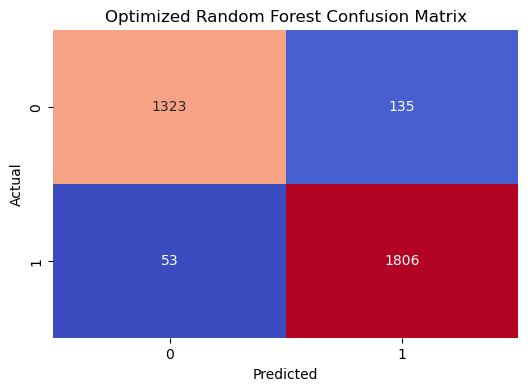

In [19]:
# Plot optimized model confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(test_y, best_predictions), annot=True, fmt="d", cmap="coolwarm", cbar=False)
plt.title(f'Optimized {best_model_name} Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

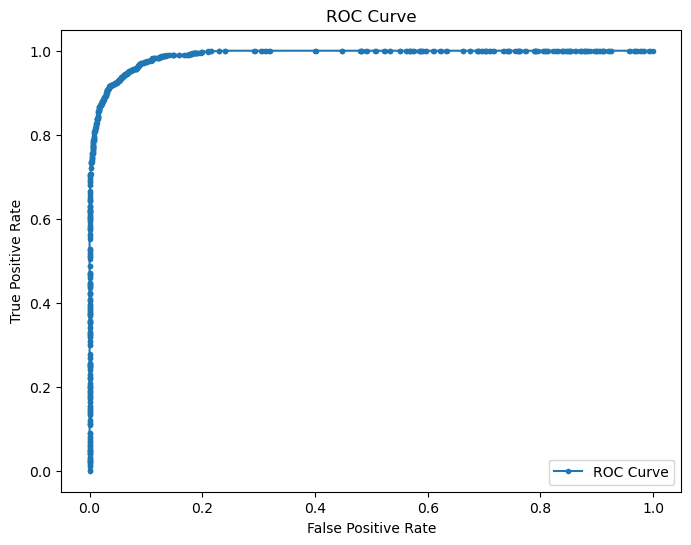

In [20]:
# Plot ROC curve
fpr, tpr, _ = roc_curve(test_y, best_model.predict_proba(test_X)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, marker='.', label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


In [21]:
# Apply PCA and retrain the best model
pca = PCA(n_components=2)
train_X_pca = pca.fit_transform(train_X)
test_X_pca = pca.transform(test_X)

In [22]:
best_model.fit(train_X_pca, train_y)
pca_predictions = best_model.predict(test_X_pca)
pca_accuracy = accuracy_score(test_y, pca_predictions)
pca_auc = roc_auc_score(test_y, best_model.predict_proba(test_X_pca)[:, 1])
print(f"PCA Model Accuracy: {pca_accuracy}")
print(f"PCA Model ROC AUC: {pca_auc}")
print(classification_report(test_y, pca_predictions))

PCA Model Accuracy: 0.6089840217063611
PCA Model ROC AUC: 0.6537670148781259
              precision    recall  f1-score   support

          -1       0.71      0.19      0.30      1458
           1       0.60      0.94      0.73      1859

    accuracy                           0.61      3317
   macro avg       0.65      0.56      0.51      3317
weighted avg       0.65      0.61      0.54      3317



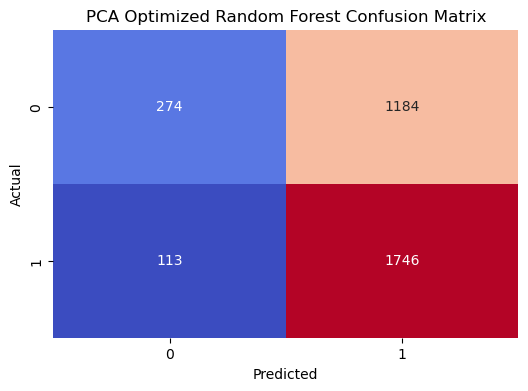

In [23]:
# Plot PCA model confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(test_y, pca_predictions), annot=True, fmt="d", cmap="coolwarm", cbar=False)
plt.title(f'PCA Optimized {best_model_name} Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

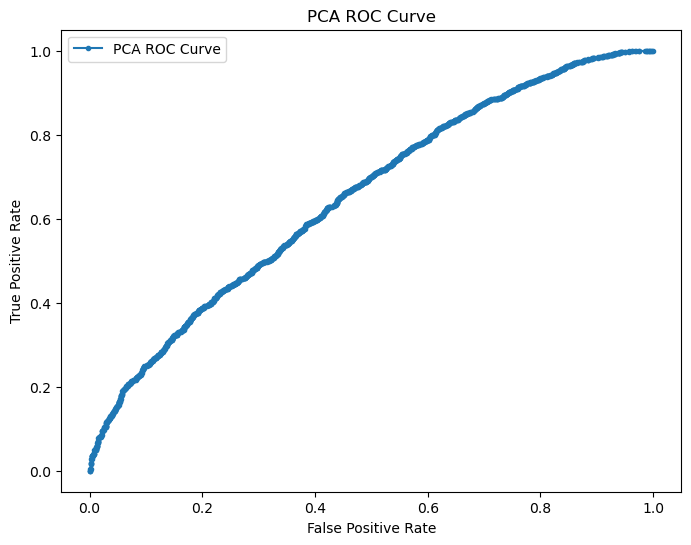

In [24]:
# Plot PCA ROC curve
fpr, tpr, _ = roc_curve(test_y, best_model.predict_proba(test_X_pca)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, marker='.', label='PCA ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('PCA ROC Curve')
plt.legend()
plt.show()

### Conclusion

The Phishing Website Detection project successfully utilized various machine learning models to identify phishing websites, with the Random Forest classifier achieving the highest performance. Key findings highlight the significance of features such as IP addresses and URL characteristics in detecting phishing attempts. Future improvements could include advanced feature engineering and the exploration of more sophisticated models like XGBoost to further enhance detection accuracy.
